In [0]:
import numpy as np
import pandas as pd

## Basic Dataframe operations

In [0]:
d = {'one': pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two': pd.Series([111., 222., 333., 444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [0]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,444.0


In [0]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,444.0,NaN


In [0]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,444.0,NaN,False


In [0]:
three = df.pop('three')
print(three)
print(type(three))

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64
<class 'pandas.core.series.Series'>


In [0]:
del df['two']
print(df)

          one   flag
apple   100.0  False
ball    200.0  False
cerill    NaN  False
clock   300.0   True
dancy     NaN  False


In [0]:
df.insert(2, 'copy_of_one', df['one'])
print(df)

          one   flag  copy_of_one
apple   100.0  False        100.0
ball    200.0  False        200.0
cerill    NaN  False          NaN
clock   300.0   True        300.0
dancy     NaN  False          NaN


In [0]:
df.insert(3,'NOT_flag', ~df['flag'])
print(df)

          one   flag  copy_of_one  NOT_flag
apple   100.0  False        100.0      True
ball    200.0  False        200.0      True
cerill    NaN  False          NaN      True
clock   300.0   True        300.0     False
dancy     NaN  False          NaN      True


In [0]:
del df['NOT_flag']
print(df)

          one   flag  copy_of_one
apple   100.0  False        100.0
ball    200.0  False        200.0
cerill    NaN  False          NaN
clock   300.0   True        300.0
dancy     NaN  False          NaN


In [0]:
df['one_upper_half'] = df['one'][:2]
print(df)

          one   flag  copy_of_one  one_upper_half
apple   100.0  False        100.0           100.0
ball    200.0  False        200.0           200.0
cerill    NaN  False          NaN             NaN
clock   300.0   True        300.0             NaN
dancy     NaN  False          NaN             NaN


## Obesity Case Stdy

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('https://storage.googleapis.com/dimensionless/Analytics/USDA.csv')
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [0]:
df.shape

(7058, 16)

In [0]:
df.describe()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
count,7058.000000,7057.000000,7057.000000,7057.000000,7057.000000,6974.000000,6757.000000,6770.000000,5148.000000,6922.000000,6935.000000,6649.000000,6726.000000,4338.000000,4224.000000
mean,14259.821196,219.695338,11.710368,10.320614,20.697860,322.059220,3.452267,41.551994,8.256540,73.530627,2.828368,301.357949,9.435980,1.487462,0.576918
std,8577.179705,172.198755,10.919356,16.814191,27.630443,1045.416931,6.921267,122.963028,15.361509,222.445338,6.019878,415.638949,71.256536,5.386914,4.301147
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8387.250000,85.000000,2.290000,0.720000,0.000000,37.000000,0.172000,0.000000,0.000000,9.000000,0.520000,135.000000,0.000000,0.120000,0.000000
50%,13293.500000,181.000000,8.200000,4.370000,7.130000,79.000000,1.256000,3.000000,1.395000,19.000000,1.330000,250.000000,0.000000,0.270000,0.000000
75%,18336.750000,331.000000,20.430000,12.700000,28.170000,386.000000,4.028000,69.000000,7.875000,56.000000,2.620000,348.000000,3.100000,0.710000,0.100000
max,93600.000000,902.000000,88.320000,100.000000,100.000000,38758.000000,95.600000,3100.000000,99.800000,7364.000000,123.600000,16500.000000,2400.000000,149.400000,250.000000


In [0]:
df.Sodium.max()

38758.0

In [0]:
df.Sodium.idxmax()

264

In [0]:
df.iloc[264,]

ID                    2047
Description     SALT,TABLE
Calories                 0
Protein                  0
TotalFat                 0
Carbohydrate             0
Sodium               38758
SaturatedFat             0
Cholesterol              0
Sugar                    0
Calcium                 24
Iron                  0.33
Potassium                8
VitaminC                 0
VitaminE                 0
VitaminD                 0
Name: 264, dtype: object

In [0]:
df.loc[df.Sodium==df.Sodium.max()]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
264,2047,"SALT,TABLE",0.0,0.0,0.0,0.0,38758.0,0.0,0.0,0.0,24.0,0.33,8.0,0.0,0.0,0.0


In [0]:
HighSodium = df[df['Sodium'] > 10000]
HighSodium

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
264,2047,"SALT,TABLE",0.0,0.00,0.00,0.00,38758.0,0.000,0.0,0.00,24.0,0.33,8.0,0.0,0.00,0.0
921,6075,"SOUP,BF BROTH OR BOUILLON,PDR,DRY",213.0,15.97,8.89,17.40,26000.0,4.320,10.0,16.71,60.0,1.00,446.0,0.0,2.17,0.0
922,6076,"SOUP,BEEF BROTH,CUBED,DRY",170.0,17.30,4.00,16.10,24000.0,1.990,4.0,14.51,60.0,2.23,403.0,0.0,0.00,0.0
924,6080,"SOUP,CHICK BROTH OR BOUILLON,DRY",267.0,16.66,13.88,18.01,23875.0,3.430,13.0,17.36,187.0,1.03,309.0,1.1,0.46,0.0
925,6081,"SOUP,CHICK BROTH CUBES,DRY",198.0,14.60,4.70,23.50,24000.0,1.200,13.0,0.00,190.0,1.87,374.0,1.0,0.09,NaN
937,6115,"GRAVY,AU JUS,DRY",313.0,9.20,9.63,47.49,11588.0,2.026,4.0,NaN,140.0,9.30,279.0,1.0,NaN,NaN
1302,6979,ADOBO FRESCO,271.0,2.00,20.90,18.60,17152.0,2.910,0.0,2.03,123.0,3.20,187.0,5.8,2.69,0.0
5320,18369,"LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA A...",53.0,0.00,0.00,27.70,10600.0,0.000,0.0,0.00,5876.0,11.02,20.0,0.0,0.00,0.0
5323,18372,"LEAVENING AGENTS,BAKING SODA",0.0,0.00,0.00,0.00,27360.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0
5697,19225,"DESSERTS,RENNIN,TABLETS,UNSWTND",84.0,1.00,0.10,19.80,26050.0,0.041,0.0,NaN,3733.0,7.07,292.0,0.0,NaN,NaN


In [0]:
HighSodium.shape

(10, 16)

In [0]:
HighSodium.Description.str.contains('caviar', case=False, regex=False)

264     False
921     False
922     False
924     False
925     False
937     False
1302    False
5320    False
5323    False
5697    False
Name: Description, dtype: bool

In [0]:
df.loc[df.Description.str.contains('caviar', case=False, regex=False)]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
4153,15012,CAVIAR,264.0,24.6,17.9,4.0,1500.0,4.06,588.0,0.0,275.0,11.88,181.0,0.0,1.89,2.9


In [0]:
print(df.Sodium.mean())
print(df.Sodium.std())

322.05921995985085
1045.4169311578748


In [0]:
df['HighSodium'] = (df.Sodium > df.Sodium.mean()).astype(int)
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighSodium
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,1
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,1
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,0
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,1
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,1


In [0]:
df['HighCarbs'] = (df.Carbohydrate > df.Carbohydrate.mean()).astype(int)
df['HighProtein'] = (df.Protein > df.Protein.mean()).astype(int)
df['HighFat'] = (df.SaturatedFat > df.SaturatedFat.mean()).astype(int)
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighSodium,HighCarbs,HighProtein,HighFat
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,1,0,0,1
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,1,0,0,1
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,0,0,0,1
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,1,0,1,1
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,1,0,1,1


In [0]:
pd.Series.where?

In [0]:
# df['HighCarbs'] = np.where(df.Carbohydrate > df.Carbohydrate.mean(), 1, 0)

In [0]:
print(df.HighSodium.sum())

2090


In [0]:
df.HighSodium.groupby(df.HighFat).value_counts()

HighFat  HighSodium
0        0             3635
         1             1501
1        0             1333
         1              589
Name: HighSodium, dtype: int64

In [0]:
df.Iron.groupby(df.HighProtein).mean()

HighProtein
0    2.558945
1    3.197294
Name: Iron, dtype: float64

In [0]:
df.VitaminC.groupby(df.HighCarbs).max()

HighCarbs
0    1677.6
1    2400.0
Name: VitaminC, dtype: float64

## MovieLens Case Study


In [0]:
import numpy as np
import pandas as pd

In [9]:
# ! ls /content
# ! rm -r ml-20m/
# ! rm ml-20m.zip

drive  sample_data


In [10]:
# !wget http://files.grouplens.org/datasets/movielens/ml-20m.zip
! wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-06-08 17:11:15--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.31MB/s    in 0.4s    

2020-06-08 17:11:16 (2.31 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [11]:
!ls /content

drive  ml-latest-small.zip  sample_data


In [12]:
# !unzip /content/ml-20m.zip
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [13]:
# !ls ./ml-20m/
!ls ./ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [14]:
# !cat ./ml-20m/movies.csv | wc -l
!cat ./ml-latest-small/movies.csv | wc -l

9743


In [15]:
# !head -5 ./ml-20m/movies.csv
!head -5 ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [0]:
! mkdir movielens

In [0]:
! mv ml-latest-small/* movielens

In [0]:
! cd ml-latest-small/

In [19]:
!ls

drive  ml-latest-small	ml-latest-small.zip  movielens	sample_data


In [20]:
! ls ./movielens

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [21]:
! head -5 ./movielens/ratings.csv

userId,movieId,rating,timestamp
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815


In [25]:
movies = pd.read_csv('/content/movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [26]:
tags = pd.read_csv('/content/movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Timestamp above in `tags` represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [27]:
ratings = pd.read_csv('/content/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# For current analysis, we will remove timestamp as we are not going to use it
del tags['timestamp']
del ratings['timestamp']

## Data Structures

### Series

In [29]:
# Extract 0th row: notice that it is infact a series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [30]:
print(row_0)

userId         2
movieId    60756
tag        funny
Name: 0, dtype: object


In [31]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [32]:
row_0['userId']

2

In [33]:
'rating' in row_0

False

In [34]:
'userId' in row_0

True

In [36]:
row_0.name

0

In [37]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

### DataFrames

In [38]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [39]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [40]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [48]:
tags.iloc[[0,11,2000],]

,userId,movieId,tag
0,2,60756,funny
11,18,431,gangster
2000,474,5450,women


### Descriptive Statistics

In [49]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [50]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Gettings stats of *userId* and *movieId* makes no sense, as they are merely IDs.

In [51]:
ratings['rating'].mean()

3.501556983616962

In [52]:
ratings['rating'].std()

1.0425292390605359

In [53]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [54]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [57]:
filter_1 = ratings['rating'] > 5
print(filter_1)
print()
print('Any Rating greater than 5?',filter_1.any())

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: rating, Length: 100836, dtype: bool

Any Rating greater than 5? False


In [58]:
filter_2 = ratings['rating'] > 0
print('All the ratings greater than 0?', filter_2.all())

All the ratings greater than 0? True


### Data Cleaning: Handling Missing Data

In [59]:
movies.shape

(9742, 3)

In [60]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [61]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [62]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [63]:
ratings.shape

(100836, 3)

In [64]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [65]:
tags.shape

(3683, 3)

In [66]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [0]:
# If there are any NAs in data, we have a function c/d 'dropna()' which can be used to remove those records.
# tags = tags.dropna('columns', 'any')

In [0]:
pd.DataFrame.dropna?

### Data Visualization

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d7b462e8>]],
      dtype=object)

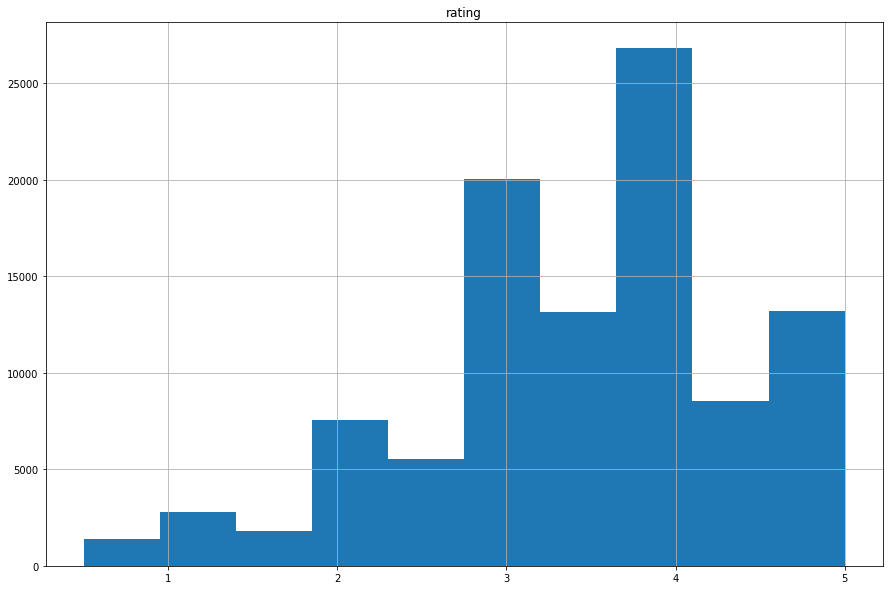

In [73]:
ratings.hist(column='rating', figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d74349b0>]],
      dtype=object)

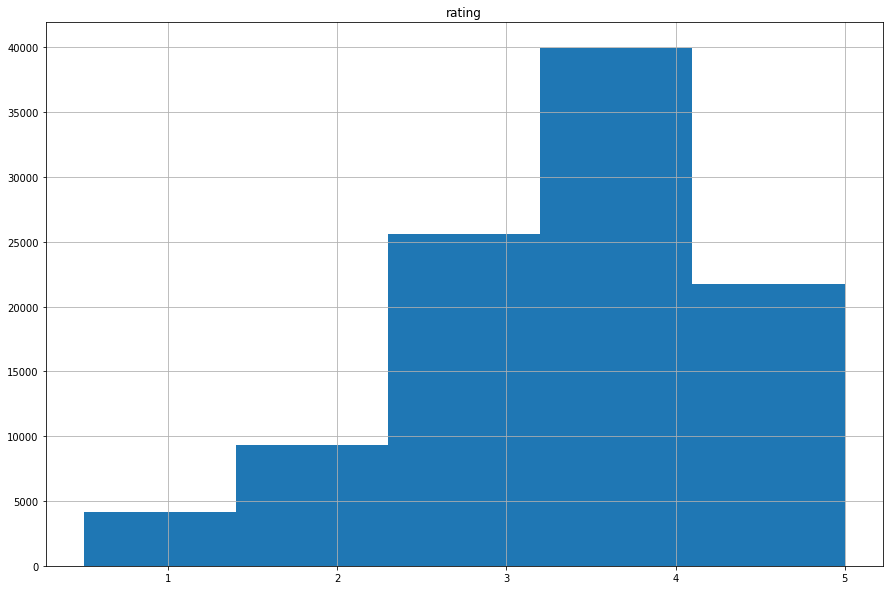

In [77]:
ratings.hist(column='rating', figsize=(15,10), bins=5)

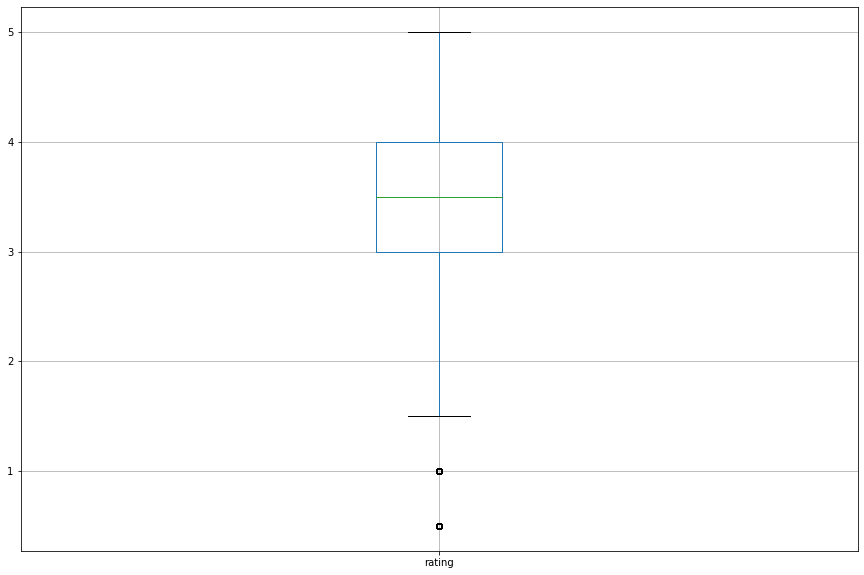

In [74]:
ratings.boxplot(column='rating', figsize=(15,10))

### Slicing Out Columns

In [78]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [80]:
tags.iloc[:,2].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [81]:
tags.loc[:, 'tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [82]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [83]:
ratings['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [85]:
tag_counts = tags['tag'].value_counts()
tag_counts

In Netflix queue               131
atmospheric                     36
superhero                       24
thought-provoking               24
Disney                          23
                              ... 
Oscar (Best Cinematography)      1
Guardians of the Galaxy          1
interwoven storylines            1
twisted                          1
preacher                         1
Name: tag, Length: 1589, dtype: int64

In [87]:
tag_counts[-10:,]

revolutionary                  1
Prince                         1
Eric Bana                      1
thought provoking              1
Bechdel Test:Fail              1
Oscar (Best Cinematography)    1
Guardians of the Galaxy        1
interwoven storylines          1
twisted                        1
preacher                       1
Name: tag, dtype: int64

In [88]:
tag_counts.sort_values(ascending=False, inplace=True)
tag_counts.head()

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
Disney                23
Name: tag, dtype: int64

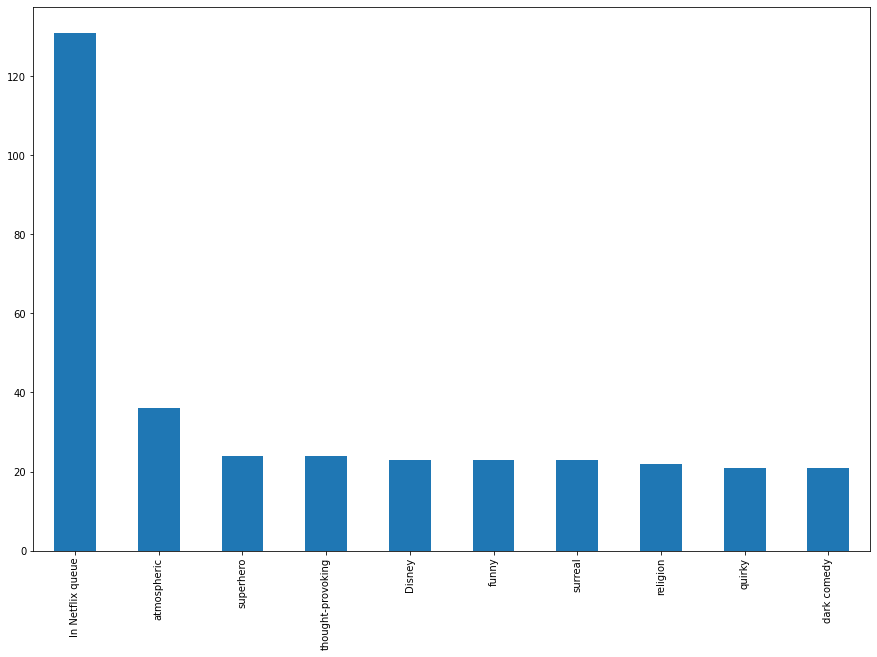

In [89]:
tag_counts[:10,].plot(kind='bar', figsize=(15,10))

In [91]:
df_1 = tags[0:3][:]
df_1

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell


In [92]:
df_1.index = ['one', 'two', 'three']
df_1

,userId,movieId,tag
one,2,60756,funny
two,2,60756,Highly quotable
three,2,60756,will ferrell


In [93]:
df_1.loc['one']

userId         2
movieId    60756
tag        funny
Name: one, dtype: object

In [94]:
df_1.loc['one', ['userId','tag']]

userId        2
tag       funny
Name: one, dtype: object